<a href="https://colab.research.google.com/github/PradipNichite/Youtube-Tutorials/blob/main/Youtube_Huggingface_Transformers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Agenda:**
Using Huggingface Transformers pre-trained models

**Resources:**
https://huggingface.co/course/chapter2/2?fw=tf







In [2]:
!pip install transformers -q

# Pipeline

In [3]:
from transformers import pipeline

classifier = pipeline("sentiment-analysis",device=0)
classifier("Food was amazing")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Downloading:   0%|          | 0.00/629 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/268M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

[{'label': 'POSITIVE', 'score': 0.9998799562454224}]

**Behind the pipeline.** <br>
pipeline groups together three steps: preprocessing, passing the inputs through the model, and postprocessing:

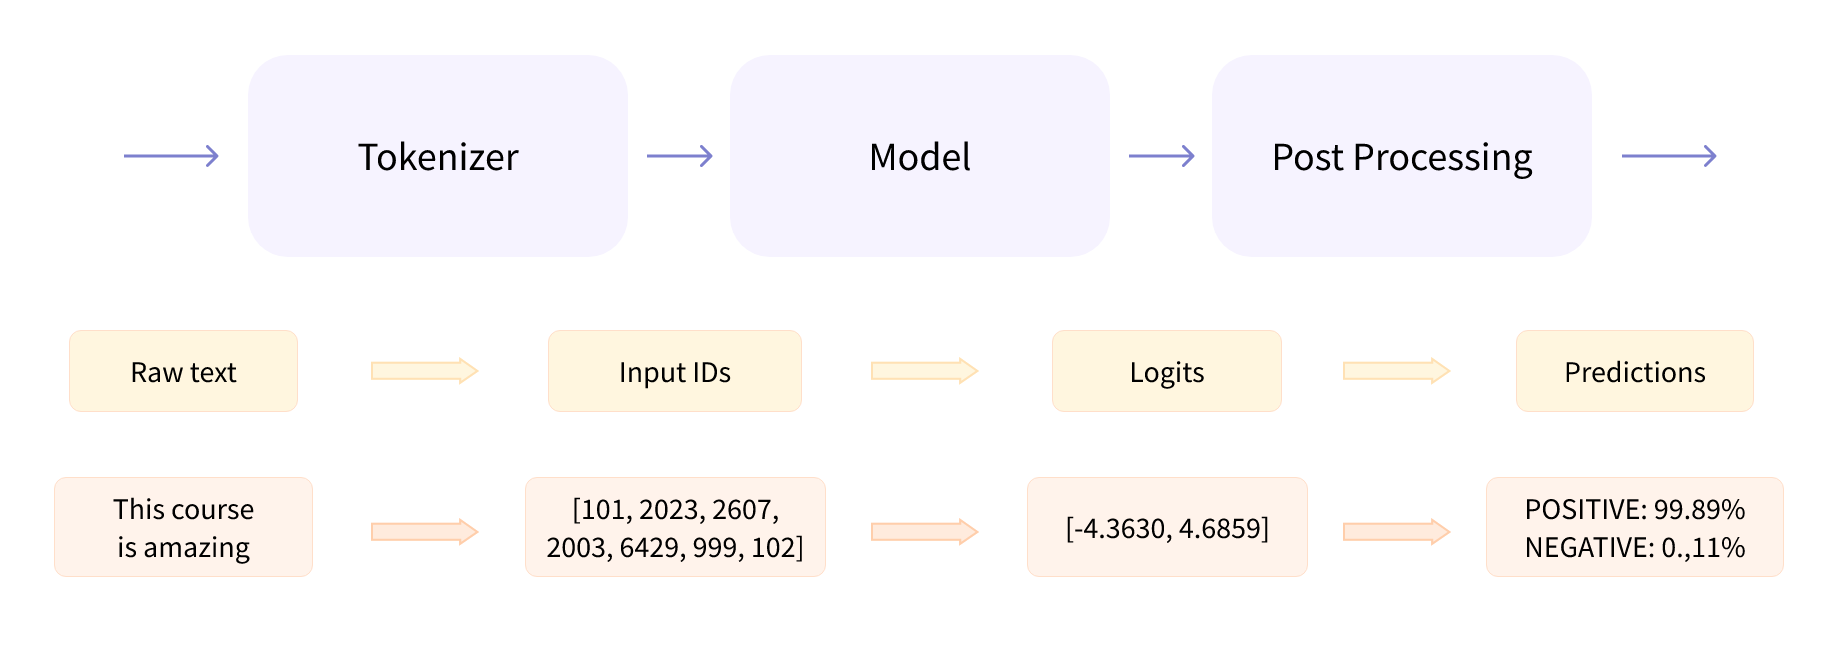

In [4]:
classifier("Moview was waste of time")

[{'label': 'NEGATIVE', 'score': 0.9997876286506653}]

In [5]:
# https://huggingface.co/cardiffnlp/twitter-roberta-base-sentiment
classifier = pipeline("sentiment-analysis",model="cardiffnlp/twitter-roberta-base-sentiment",device=0)
classifier("Food was amazing")

Downloading:   0%|          | 0.00/747 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/499M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/150 [00:00<?, ?B/s]

[{'label': 'LABEL_2', 'score': 0.9718621969223022}]

In [6]:
classifier(
    ["Food was amazing", "Moview was waste of time"]
)

[{'label': 'LABEL_2', 'score': 0.9718621969223022},
 {'label': 'LABEL_0', 'score': 0.9271152019500732}]

**Question Answering**

In [8]:
from transformers import pipeline

question_answerer = pipeline("question-answering",device=0)
# question_answerer(
#     question="Who is Pradip?",
#     context="My name is Pradip and I work as Freelancer",
# )

question_answerer(
    question="Where does Pradip Work?",
    context="My name is Pradip and I work as Freelancer on Upwork",
)

No model was supplied, defaulted to distilbert-base-cased-distilled-squad and revision 626af31 (https://huggingface.co/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.


{'score': 0.9836946129798889, 'start': 46, 'end': 52, 'answer': 'Upwork'}

In [10]:
from transformers import pipeline

# ner = pipeline("ner",device=0)
ner = pipeline("ner",aggregation_strategy="simple",device=0)
ner("Sundar Pichai is CEO of Google")

No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english and revision f2482bf (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


[{'entity_group': 'PER',
  'score': 0.99562234,
  'word': 'Sundar Pichai',
  'start': 0,
  'end': 13},
 {'entity_group': 'ORG',
  'score': 0.9987669,
  'word': 'Google',
  'start': 24,
  'end': 30}]

In [11]:
from transformers import pipeline

summarizer = pipeline("summarization",device=0)
text = """
    America has changed dramatically during recent years. Not only has the number of 
    graduates in traditional engineering disciplines such as mechanical, civil, 
    electrical, chemical, and aeronautical engineering declined, but in most of 
    the premier American universities engineering curricula now concentrate on 
    and encourage largely the study of engineering science. As a result, there 
    are declining offerings in engineering subjects dealing with infrastructure, 
    the environment, and related issues, and greater concentration on high 
    technology subjects, largely supporting increasingly complex scientific 
    developments. While the latter is important, it should not be at the expense 
    of more traditional engineering.
"""
summarizer(text, max_length=30, min_length=10)

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


Downloading:   0%|          | 0.00/1.80k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

[{'summary_text': ' America has changed dramatically during recent years . There are declining offerings in engineering subjects dealing with infrastructure,  the environment, and related issues .'}]

In [12]:
from transformers import pipeline

generator = pipeline("text-generation",device=0)
generator("In this course, we will teach you how to")

No model was supplied, defaulted to gpt2 and revision 6c0e608 (https://huggingface.co/gpt2).
Using a pipeline without specifying a model name and revision in production is not recommended.


Downloading:   0%|          | 0.00/665 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/548M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
/usr/local/lib/python3.7/dist-packages/transformers/generation_utils.py:1232: UserWarning: Neither `max_length` nor `max_new_tokens` has been set, `max_length` will default to 50 (`self.config.max_length`). Controlling `max_length` via the config is deprecated and `max_length` will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  UserWarning,


[{'generated_text': 'In this course, we will teach you how to use OpenCV to create your own OpenCV API from the source code of the standard OpenCV projects such as openCV1.3.\n\nCourse Topics\n\nObjects to be used in'}]